In [2]:
## Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
# Load diabetes dataset
diabetes = pd.read_csv(r"C:\Users\Administrator\Desktop\Datasets\diabetes.csv")

In [54]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes.shape

(768, 9)

### Create feature and target set of the dataset

In [8]:
X_feature = diabetes.iloc[:,:-1]
Y_target = diabetes.iloc[:,-1]

In [10]:
X_feature.head()
print(X_feature.shape)

(768, 8)


In [11]:
Y_target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### Split the data into train and test sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_feature,Y_target, test_size=0.2, random_state= 42)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


### Create the RandomForest model

In [48]:
clf = RandomForestClassifier(random_state=365, ccp_alpha=0.02)

In [49]:
clf.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.02, random_state=365)

In [50]:
y_pred = clf.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



### Accuracy of the model is 77.9%

In [56]:
clf.predict([[1,93,70,31,0,30.4,0.315,23]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [52]:
print(metrics.accuracy_score(y_test,y_pred)*100)

77.92207792207793


In [27]:
from sklearn import metrics

In [28]:
cm = metrics.confusion_matrix(y_pred,y_test)

In [29]:
cm

array([[90, 25],
       [ 9, 30]], dtype=int64)

In [30]:
import seaborn as sn

Text(33.0, 0.5, 'Actual')

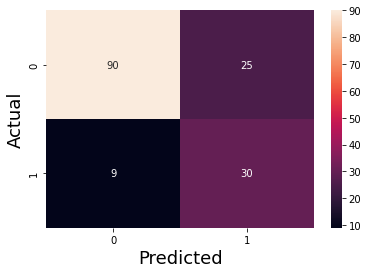

In [36]:
sn.heatmap(cm, annot = True)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)